### Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [2]:
data = pd.read_csv("/content/mystery_well.csv")
data

Unnamed: 0       WELL   DEPTH_MD         X_LOC      Y_LOC        Z_LOC  \
0               0  31/2-19 S  1537.2784  520157.59375  6753015.0 -1514.570923   
1               1  31/2-19 S  1537.4304  520157.56250  6753015.0 -1514.721436   
2               2  31/2-19 S  1537.5824  520157.56250  6753015.0 -1514.871826   
3               3  31/2-19 S  1537.7344  520157.53125  6753015.0 -1515.022217   
4               4  31/2-19 S  1537.8864  520157.50000  6753015.0 -1515.172607   
...           ...        ...        ...           ...        ...          ...   
16065       16065  31/2-19 S  4059.2624  518883.34375  6753493.5 -3593.686279   
16066       16066  31/2-19 S  4059.4144  518883.31250  6753493.5 -3593.833496   
16067       16067  31/2-19 S  4059.5664  518883.25000  6753493.5 -3593.980713   
16068       16068  31/2-19 S  4059.7184  518883.21875  6753493.5 -3594.127686   
16069       16069  31/2-19 S  4059.8704  518883.18750  6753493.5 -3594.274902   

            CALI      RMED      RDEP      RHOB          GR      NPHI  \
0      16.915091  0.970301  0.967368       NaN  155.000687  0.489855   
1      17.062044  0.951038  0.943618  2.065471  158.357468  0.507444   
2      17.215485  0.940773  0.941428       NaN  154.849472  0.517302   
3      17.230671  0.918687  0.917324       NaN  153.149261  0.542876   
4      17.227697  0.875301  0.873140  1.960966  154.389771  0.559193   
...          ...       ...       ...       ...         ...       ...   
16065   8.496387  8.234701  9.088706       NaN   33.672890  0.120742   
16066   8.469977  7.840925  8.698893  2.505821   32.728756  0.122617   
16067   8.291380  6.388719  7.350617       NaN   33.843975  0.124884   
16068   8.180573  5.577281  6.158786       NaN   34.254128  0.127711   
16069   8.192591  4.511611  5.079177       NaN   35.037941  0.133222   

            PEF      DRHO         DTC          SP         BS  
0      4.239095  0.034806  136.143692  142.235397  12.250001  
1      4.360284  0.027745  138.066788  141.834976  12.250001  
2      4.502670  0.023892  139.611694  142.051178  12.250001  
3      4.859397  0.023240  142.077103  142.475235  12.250001  
4      5.018977  0.015859  144.969299  142.213425  12.250001  
...         ...       ...         ...         ...        ...  
16065  4.590245  0.014313   72.625191  163.583664   8.500000  
16066  4.568152  0.005614   72.021523  164.434052   8.500000  
16067  4.314456 -0.002151   73.153671  165.289703   8.500000  
16068  4.161140 -0.006702   73.964172  164.109253   8.500000  
16069  4.335057 -0.006154   74.375595  164.015747   8.500000  

[16070 rows x 17 columns]

In [3]:
print(f"Columns in the dataset\n {data.columns}")

Columns in the dataset
 Index(['Unnamed: 0', 'WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI',
       'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DRHO', 'DTC', 'SP', 'BS'],
      dtype='object')


In [ ]:
data.describe()

Unnamed: 0      DEPTH_MD          X_LOC         Y_LOC         Z_LOC  \
count  16070.000000  16070.000000   16070.000000  1.607000e+04  16070.000000   
mean    8034.500000   2786.594852  519528.986174  6.753297e+06  -2531.907010   
std     4639.153748    736.343128     408.802023  1.319747e+02    592.170862   
min        0.000000   1537.278400  518883.187500  6.753015e+06  -3594.274902   
25%     4017.250000   2147.900400  519154.523438  6.753225e+06  -3040.549256   
50%     8034.500000   2758.978400  519542.843750  6.753296e+06  -2505.205566   
75%    12051.750000   3429.792400  519908.578125  6.753407e+06  -2022.164032   
max    16069.000000   4059.870400  520157.593750  6.753494e+06  -1514.570923   

               CALI          RMED          RDEP         RHOB            GR  \
count  16070.000000  16070.000000  16070.000000  3836.000000  16070.000000   
mean      11.473080      6.502823      6.777295     2.420023    125.155409   
std        2.277865      7.537513      9.400018     0.167191     64.523544   
min        8.122212      0.567681      0.648959     1.498699     14.164156   
25%        8.859513      1.435901      1.461888     2.318382     88.658529   
50%       12.518019      2.836422      2.902886     2.446155    117.266617   
75%       12.937618      9.453140     10.209137     2.551741    144.495384   
max       19.630011    115.806114    426.207184     3.093508    632.902954   

               NPHI           PEF          DRHO           DTC            SP  \
count  16070.000000  16070.000000  16070.000000  16070.000000  16070.000000   
mean       0.310291      3.981461     -0.002020     92.000278     60.481404   
std        0.095395      0.834186      0.018218     20.777301    150.058178   
min        0.038075      1.480428     -0.344414     43.755905   -246.605804   
25%        0.245677      3.375037     -0.012232     74.521292   -103.497128   
50%        0.317103      3.889190     -0.004655     84.703884    146.984497   
75%        0.372767      4.432575      0.002931    106.086712    160.797371   
max        0.630502     15.050388      0.160166    154.691605    192.213745   

                 BS  
count  16070.000000  
mean      10.806047  
std        1.824803  
min        8.500000  
25%        8.500000  
50%       12.250001  
75%       12.250001  
max       12.250001

In [4]:
# Dropping the column named "Unnamed: 0"
data.drop(columns="Unnamed: 0", inplace=True)
data

WELL   DEPTH_MD         X_LOC      Y_LOC        Z_LOC       CALI  \
0      31/2-19 S  1537.2784  520157.59375  6753015.0 -1514.570923  16.915091   
1      31/2-19 S  1537.4304  520157.56250  6753015.0 -1514.721436  17.062044   
2      31/2-19 S  1537.5824  520157.56250  6753015.0 -1514.871826  17.215485   
3      31/2-19 S  1537.7344  520157.53125  6753015.0 -1515.022217  17.230671   
4      31/2-19 S  1537.8864  520157.50000  6753015.0 -1515.172607  17.227697   
...          ...        ...           ...        ...          ...        ...   
16065  31/2-19 S  4059.2624  518883.34375  6753493.5 -3593.686279   8.496387   
16066  31/2-19 S  4059.4144  518883.31250  6753493.5 -3593.833496   8.469977   
16067  31/2-19 S  4059.5664  518883.25000  6753493.5 -3593.980713   8.291380   
16068  31/2-19 S  4059.7184  518883.21875  6753493.5 -3594.127686   8.180573   
16069  31/2-19 S  4059.8704  518883.18750  6753493.5 -3594.274902   8.192591   

           RMED      RDEP      RHOB          GR      NPHI       PEF      DRHO  \
0      0.970301  0.967368       NaN  155.000687  0.489855  4.239095  0.034806   
1      0.951038  0.943618  2.065471  158.357468  0.507444  4.360284  0.027745   
2      0.940773  0.941428       NaN  154.849472  0.517302  4.502670  0.023892   
3      0.918687  0.917324       NaN  153.149261  0.542876  4.859397  0.023240   
4      0.875301  0.873140  1.960966  154.389771  0.559193  5.018977  0.015859   
...         ...       ...       ...         ...       ...       ...       ...   
16065  8.234701  9.088706       NaN   33.672890  0.120742  4.590245  0.014313   
16066  7.840925  8.698893  2.505821   32.728756  0.122617  4.568152  0.005614   
16067  6.388719  7.350617       NaN   33.843975  0.124884  4.314456 -0.002151   
16068  5.577281  6.158786       NaN   34.254128  0.127711  4.161140 -0.006702   
16069  4.511611  5.079177       NaN   35.037941  0.133222  4.335057 -0.006154   

              DTC          SP         BS  
0      136.143692  142.235397  12.250001  
1      138.066788  141.834976  12.250001  
2      139.611694  142.051178  12.250001  
3      142.077103  142.475235  12.250001  
4      144.969299  142.213425  12.250001  
...           ...         ...        ...  
16065   72.625191  163.583664   8.500000  
16066   72.021523  164.434052   8.500000  
16067   73.153671  165.289703   8.500000  
16068   73.964172  164.109253   8.500000  
16069   74.375595  164.015747   8.500000  

[16070 rows x 16 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16070 entries, 0 to 16069
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   WELL      16070 non-null  object 
 1   DEPTH_MD  16070 non-null  float64
 2   X_LOC     16070 non-null  float64
 3   Y_LOC     16070 non-null  float64
 4   Z_LOC     16070 non-null  float64
 5   CALI      16070 non-null  float64
 6   RMED      16070 non-null  float64
 7   RDEP      16070 non-null  float64
 8   RHOB      3836 non-null   float64
 9   GR        16070 non-null  float64
 10  NPHI      16070 non-null  float64
 11  PEF       16070 non-null  float64
 12  DRHO      16070 non-null  float64
 13  DTC       16070 non-null  float64
 14  SP        16070 non-null  float64
 15  BS        16070 non-null  float64
dtypes: float64(15), object(1)
memory usage: 2.0+ MB


In [5]:
# Check for NaN values in each column
nan_columns = data.isna().any()
print(nan_columns)

WELL        False
DEPTH_MD    False
X_LOC       False
Y_LOC       False
Z_LOC       False
CALI        False
RMED        False
RDEP        False
RHOB         True
GR          False
NPHI        False
PEF         False
DRHO        False
DTC         False
SP          False
BS          False
dtype: bool


In [ ]:
# Check if there are any NaN values in the entire DataFrame
has_nan = data.isna().any().any()
print(f"DataFrame contains NaN values: {has_nan}")

DataFrame contains NaN values: True


In [ ]:
# Get the count of NaN values in each column
nan_counts = data.isna().sum()
print(nan_counts)

WELL            0
DEPTH_MD        0
X_LOC           0
Y_LOC           0
Z_LOC           0
CALI            0
RMED            0
RDEP            0
RHOB        12234
GR              0
NPHI            0
PEF             0
DRHO            0
DTC             0
SP              0
BS              0
dtype: int64


In [6]:
# Dropping the column "RHOB" since it contains a lot of missing values
data.drop(columns="RHOB", inplace=True)

### Checking the skewness and the distribution of each column

In [ ]:
data.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RMED', 'RDEP',
       'GR', 'NPHI', 'PEF', 'DRHO', 'DTC', 'SP', 'BS'],
      dtype='object')

In [7]:
"""
The WELL column contains only one unique value,
which means it does not provide any variability or useful information for the machine learning task.
Including such a column in your analysis or model can be redundant and may not contribute
to the predictive power of your model.
"""
# Check unique values in the WELL column
unique_wells = data['WELL'].unique()
print(f"Unique values in 'WELL' column: {unique_wells}")

# If there is only one unique value, drop the column
if len(unique_wells) == 1:
    data.drop(columns=['WELL'], inplace=True)
    print("'WELL' column dropped as it contains only one unique value.")
else:
    print("'WELL' column contains multiple unique values and needs further handling.")



Unique values in 'WELL' column: ['31/2-19 S']
'WELL' column dropped as it contains only one unique value.


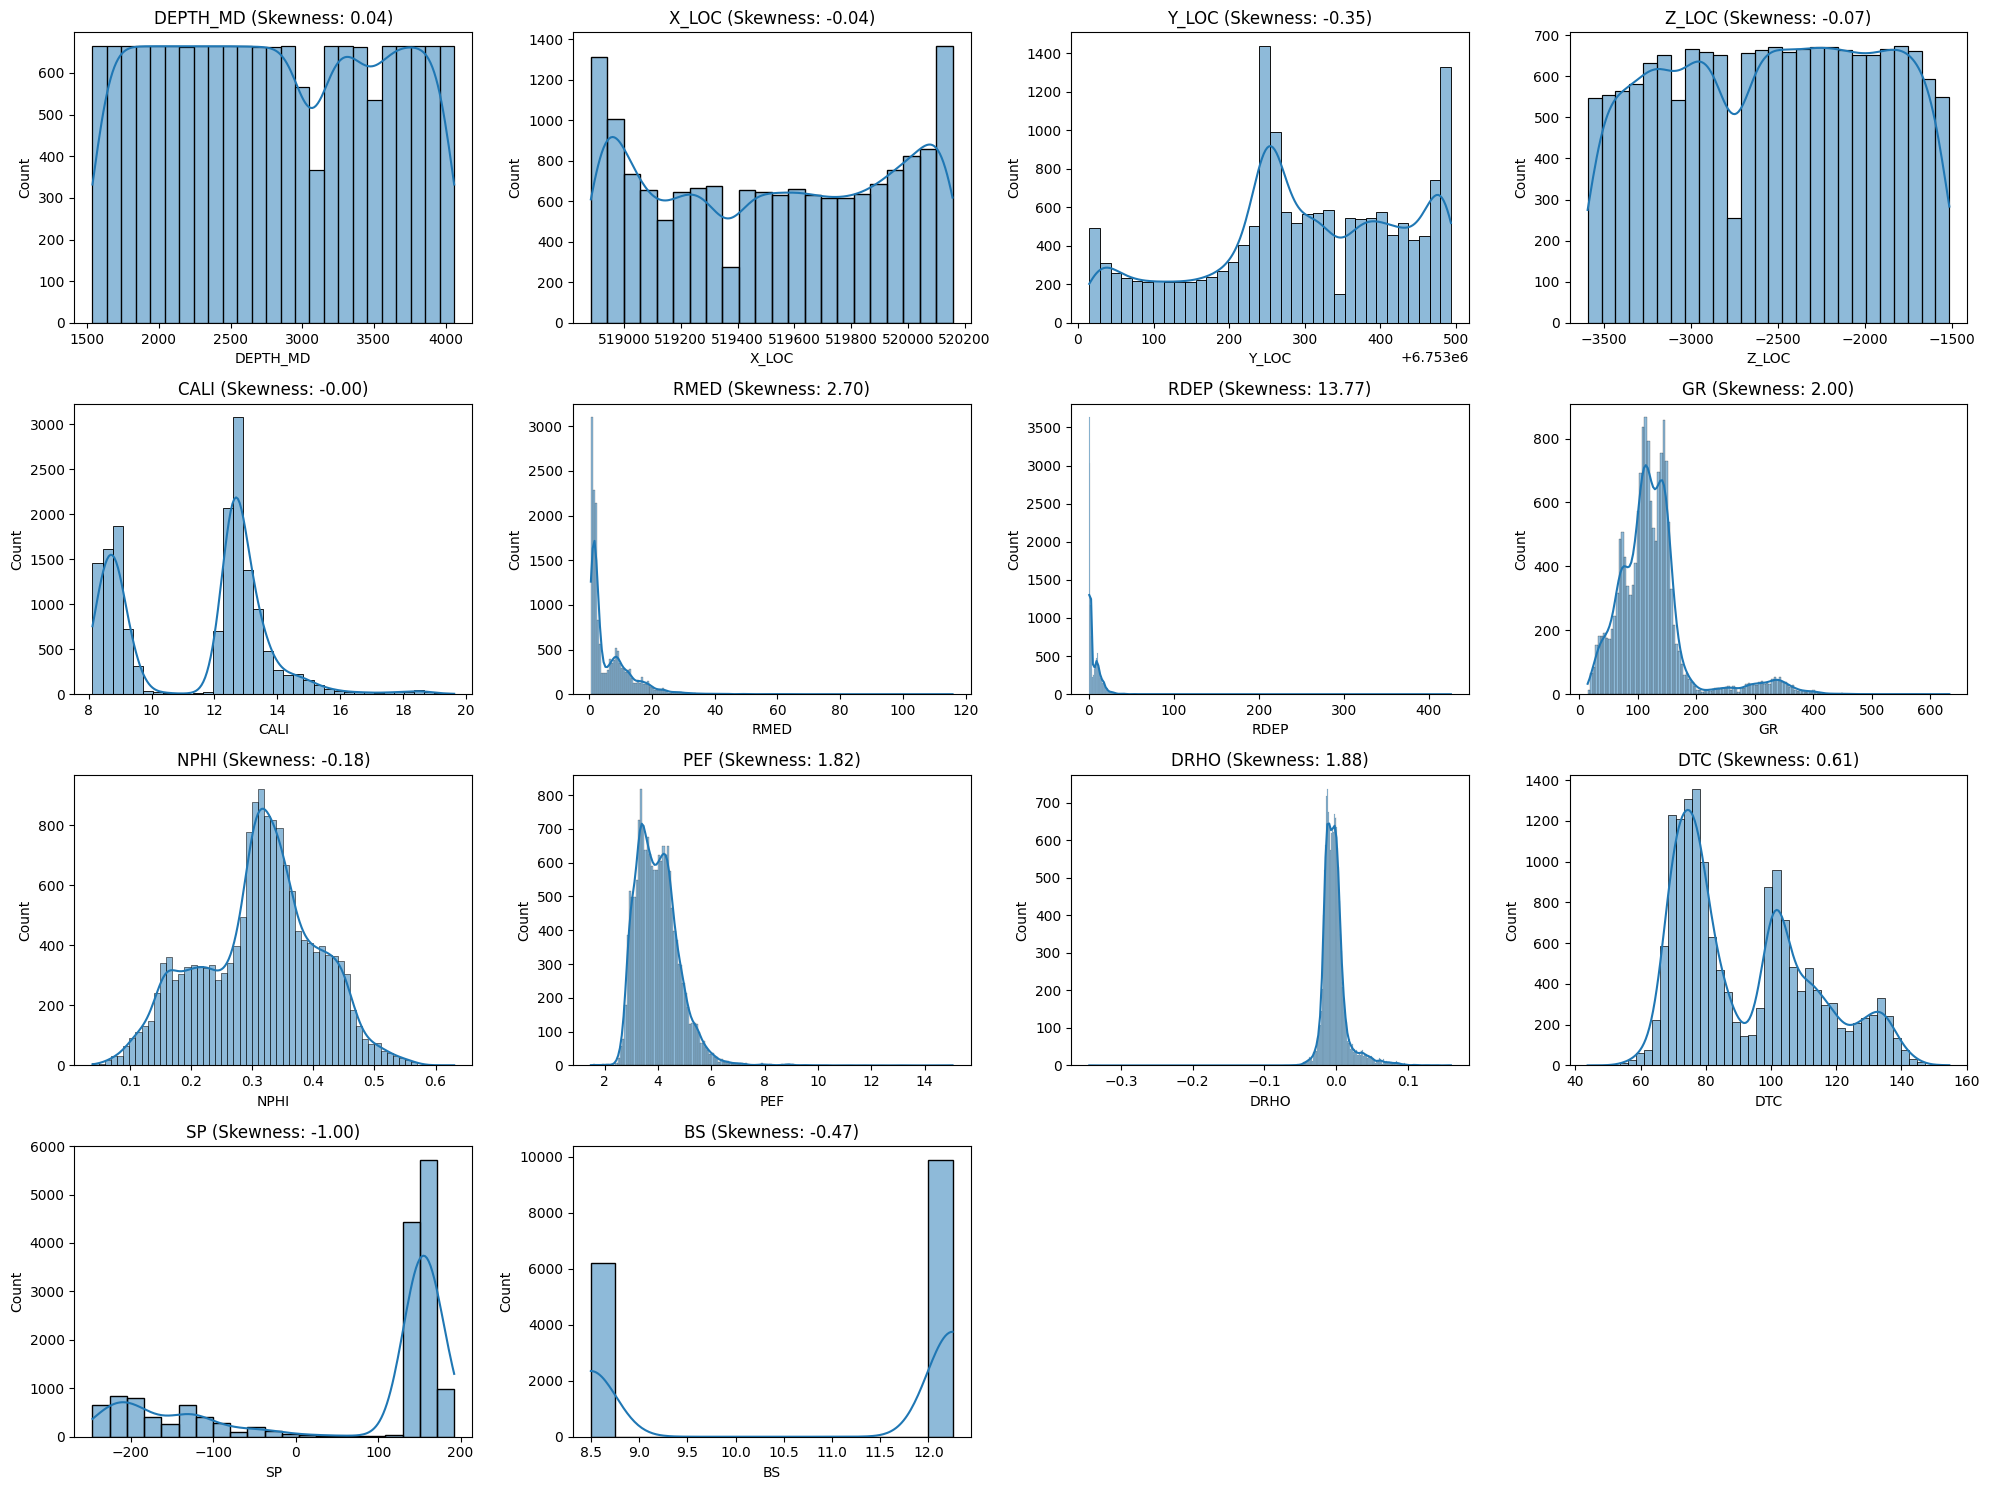

In [ ]:
# Select features
features = data.columns.to_list()

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Loop through each feature and plot its distribution
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data[feature].dropna(), kde=True)
    plt.title(f'{feature} (Skewness: {skew(data[feature].dropna()):.2f})')

plt.tight_layout()
plt.show()

##### **Summary of the skewness**

DEPTH_MD 0.04

X_LOC -0.04

Y_LOC -0.35

Z_LOC -0.07

CALI -0.00

RMED 2.7

RDEP 13.77

GR 2.00

NPHI -0.18

PEF 1.82

DRHO 1.88

DTC 0.61

SP -1.00

BS -0.47


### Checking for correlation before applying any transformation to the data

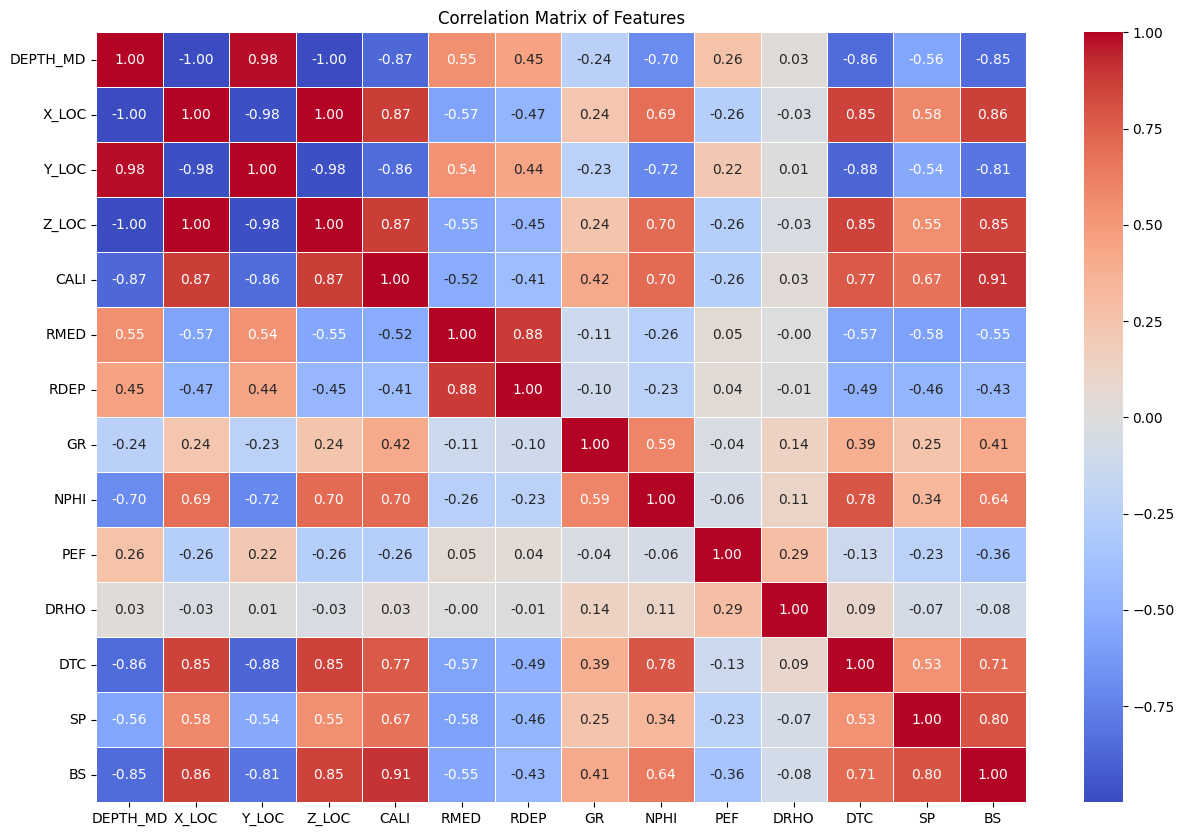

In [ ]:

# Select features
features = data.columns.to_list()

# Compute the correlation matrix
correlation_matrix = data[features].corr()

# Print the correlation matrix
# print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

### Applying log transformation to highly skewed columns and checking if their skewness were reduced

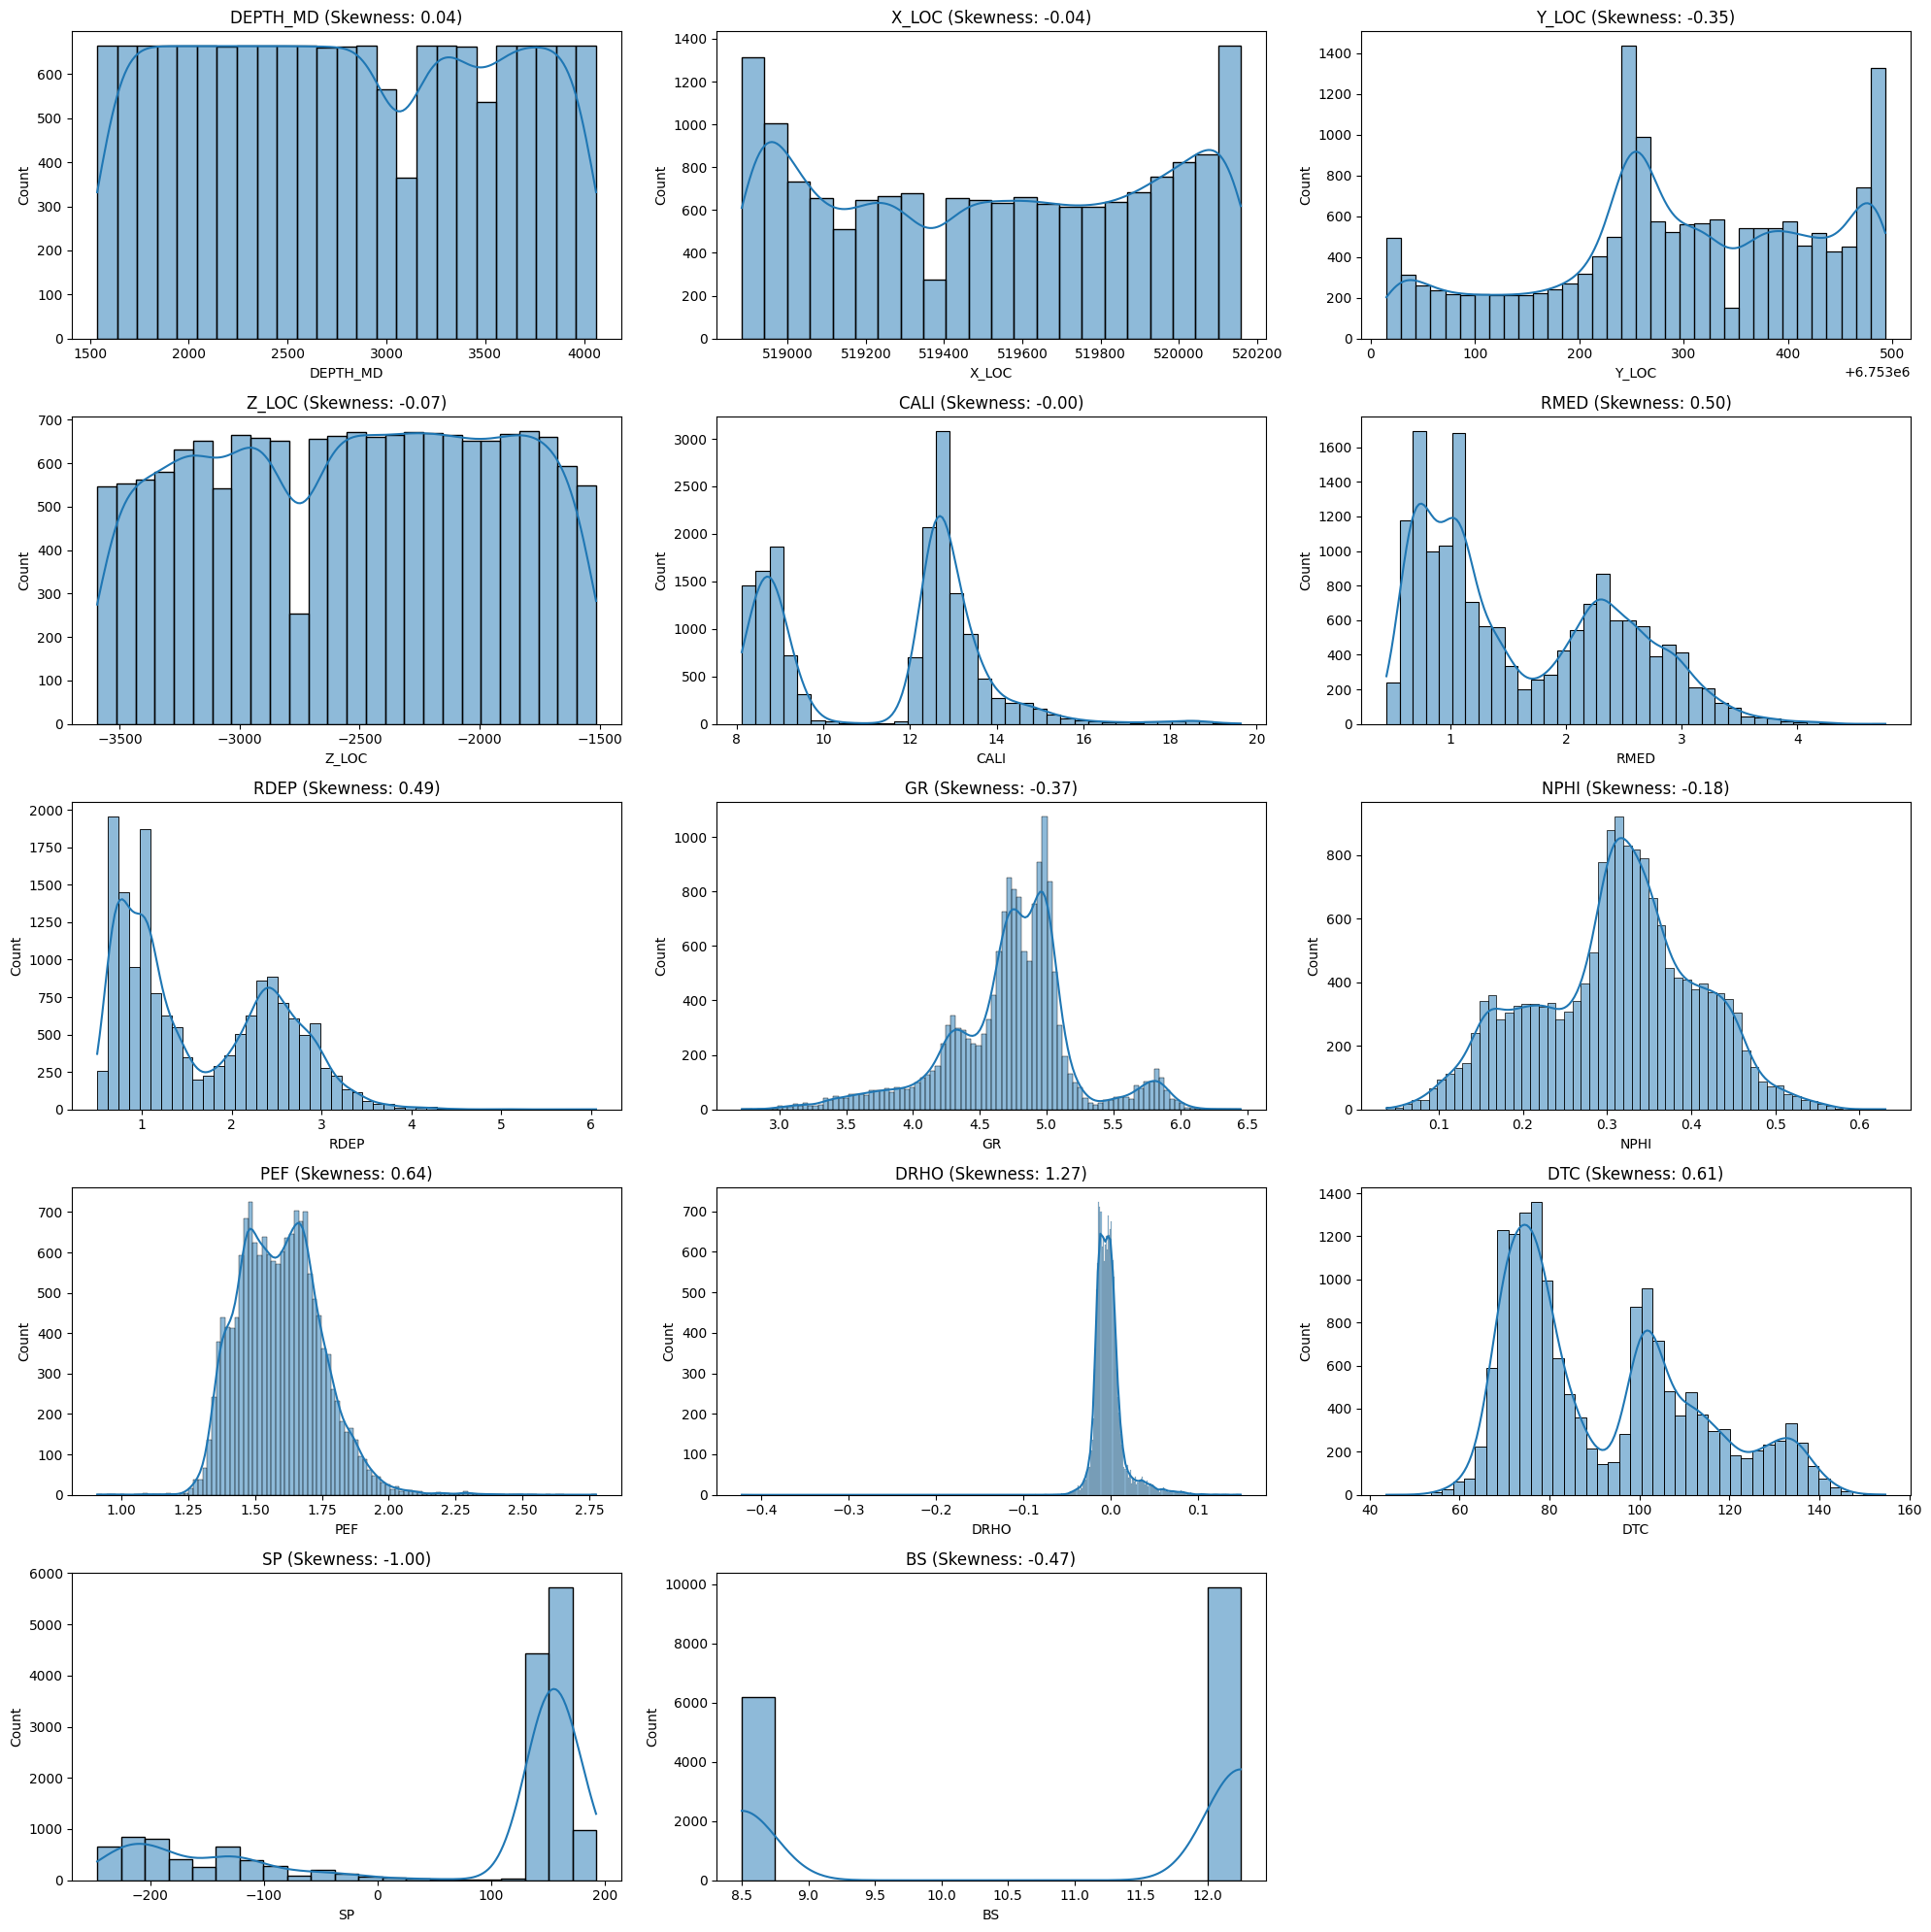

In [8]:

# Select relevant features
features = data.columns.to_list()

# Apply log transformation to highly skewed features
for feature in ['RMED', 'RDEP', 'GR', 'PEF', 'DRHO']:
    data[feature] = np.log1p(data[feature])

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Loop through each feature and plot its distribution
for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)
    sns.histplot(data[feature].dropna(), kde=True)
    plt.title(f'{feature} (Skewness: {skew(data[feature].dropna()):.2f})')

plt.tight_layout()
plt.show()

#### Checking correlation again after the transformation

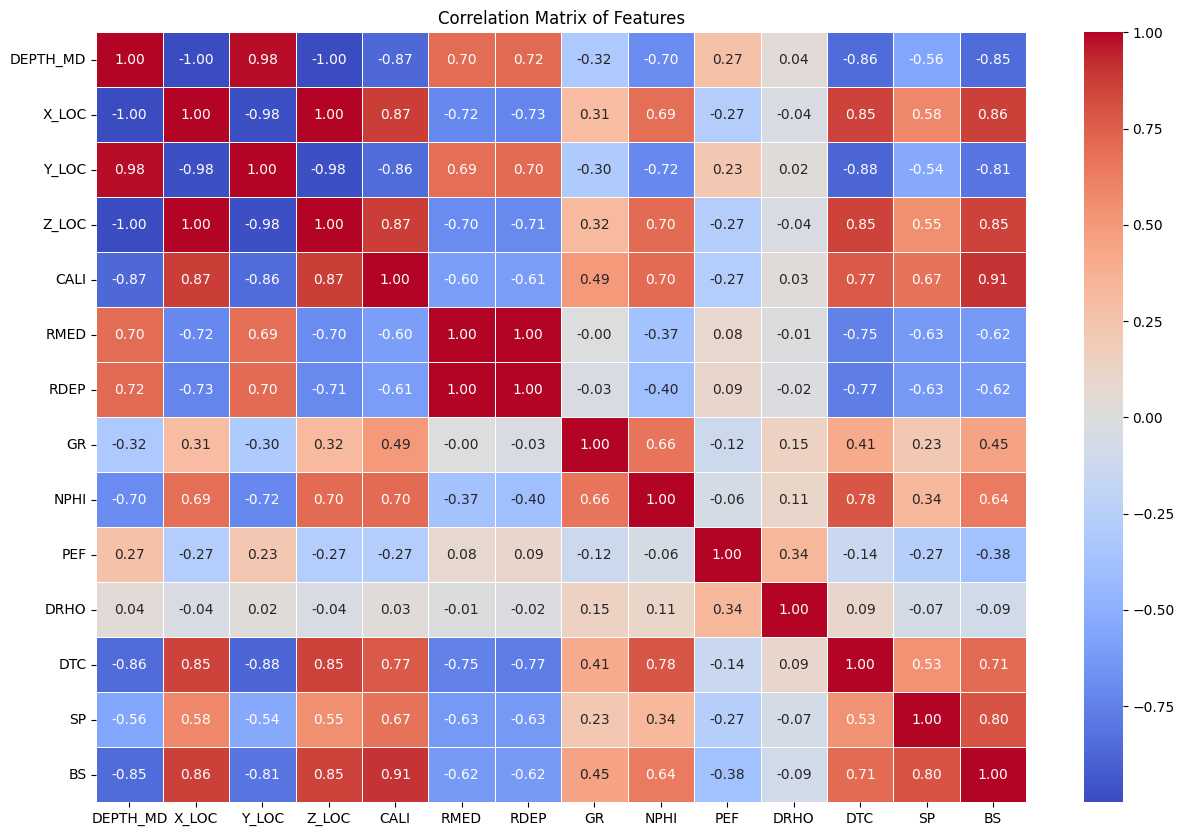

In [ ]:
# Select features
features = data.columns.to_list()

# Compute the correlation matrix
correlation_matrix = data[features].corr()

# Print the correlation matrix
# print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

"""
There has been a great increase in the correlation among the featueres after appying the log transformation
"""

### Starting the training

- K-means algorithm was chosen for this implementation

In [9]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

#### Determine the optimal number of clusters using the Elbow Method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

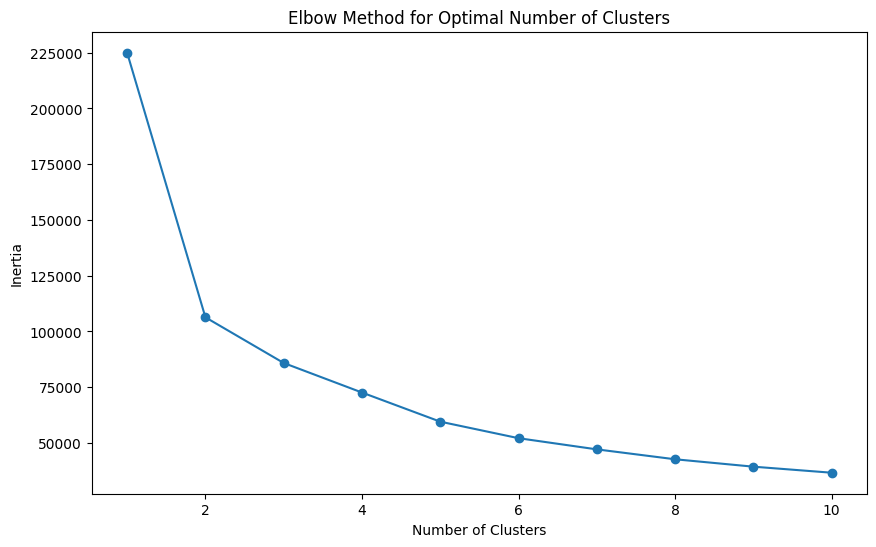

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


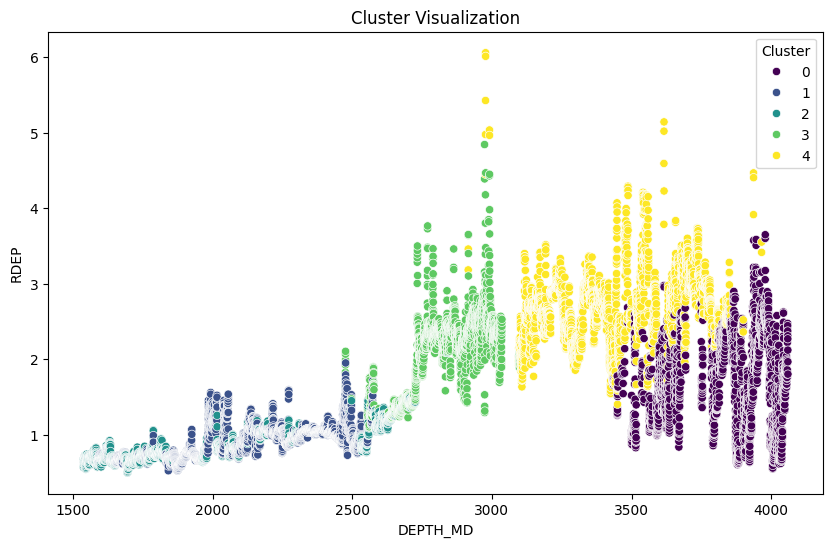

Cluster Centers:
[[ 1.4159063  -1.38646826  1.31053833 -1.4332321  -1.29325555 -0.03838098
   0.03322694 -1.35917933 -1.49183695  0.58993895  0.14808409 -0.94252551
  -0.14233299 -1.26376283]
 [-0.86033929  0.89278567 -0.71252359  0.85545344  0.58574693 -0.813991
  -0.83850767 -0.20273947  0.09517463 -0.67885845 -0.59742936  0.51874127
   0.63809938  0.79131785]
 [-1.11448857  1.09512144 -1.2363973   1.11161291  1.10683925 -0.95412885
  -0.97708636  0.71044202  1.26455785  0.50384604  1.13014125  1.45350725
   0.59005241  0.79131785]
 [ 0.05244605 -0.06171203  0.07107409 -0.04331056  0.54329598  0.48927318
   0.52871275  0.91384804  0.41477973 -0.50042335 -0.42766443 -0.25058512
   0.6663116   0.79131785]
 [ 0.87527713 -0.90980329  0.84273752 -0.86370531 -1.04954116  1.27645008
   1.24976225 -0.09387243 -0.39191867  0.41670156  0.09836759 -0.86940297
  -1.52405601 -1.25412836]]


In [ ]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Visualize the clusters (example using two features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['DEPTH_MD'], y=data['RDEP'], hue=data['Cluster'], palette='viridis')
plt.xlabel('DEPTH_MD')
plt.ylabel('RDEP')
plt.title('Cluster Visualization')
plt.show()

# Print the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

In [ ]:
# Viewing the dataset with the clusters attached
data

DEPTH_MD         X_LOC      Y_LOC        Z_LOC       CALI      RMED  \
0      1537.2784  520157.59375  6753015.0 -1514.570923  16.915091  0.678186   
1      1537.4304  520157.56250  6753015.0 -1514.721436  17.062044  0.668361   
2      1537.5824  520157.56250  6753015.0 -1514.871826  17.215485  0.663086   
3      1537.7344  520157.53125  6753015.0 -1515.022217  17.230671  0.651641   
4      1537.8864  520157.50000  6753015.0 -1515.172607  17.227697  0.628769   
...          ...           ...        ...          ...        ...       ...   
16065  4059.2624  518883.34375  6753493.5 -3593.686279   8.496387  2.222968   
16066  4059.4144  518883.31250  6753493.5 -3593.833496   8.469977  2.179392   
16067  4059.5664  518883.25000  6753493.5 -3593.980713   8.291380  1.999954   
16068  4059.7184  518883.21875  6753493.5 -3594.127686   8.180573  1.883621   
16069  4059.8704  518883.18750  6753493.5 -3594.274902   8.192591  1.706857   

           RDEP        GR      NPHI       PEF      DRHO         DTC  \
0      0.676696  5.049860  0.489855  1.656149  0.034214  136.143692   
1      0.664551  5.071150  0.507444  1.679017  0.027367  138.066788   
2      0.663424  5.048891  0.517302  1.705233  0.023611  139.611694   
3      0.650930  5.037921  0.542876  1.768047  0.022974  142.077103   
4      0.627616  5.045937  0.559193  1.794917  0.015735  144.969299   
...         ...       ...       ...       ...       ...         ...   
16065  2.311417  3.545958  0.120742  1.721023  0.014212   72.625191   
16066  2.272012  3.518351  0.122617  1.717063  0.005598   72.021523   
16067  2.122335  3.550880  0.124884  1.670431 -0.002153   73.153671   
16068  1.968340  3.562583  0.127711  1.641157 -0.006725   73.964172   
16069  1.804869  3.584572  0.133222  1.674300 -0.006173   74.375595   

               SP         BS  Cluster  
0      142.235397  12.250001        2  
1      141.834976  12.250001        2  
2      142.051178  12.250001        2  
3      142.475235  12.250001        2  
4      142.213425  12.250001        2  
...           ...        ...      ...  
16065  163.583664   8.500000        0  
16066  164.434052   8.500000        0  
16067  165.289703   8.500000        0  
16068  164.109253   8.500000        0  
16069  164.015747   8.500000        0  

[16070 rows x 15 columns]

### Checking other metrics


In [ ]:
"""
1. Inertia (Within-Cluster Sum of Squares)
Definition: Measures the sum of squared distances between each point and its assigned cluster center.
Usage: Lower values indicate tighter clusters. Used in the Elbow Method to determine the optimal number of clusters.

2. Silhouette Score
Definition: Measures how similar a point is to its own cluster compared to other clusters.
Range: -1 to 1 (higher is better).

3. Davies-Bouldin Index
Definition: Measures the average similarity ratio of each cluster with its most similar cluster.
Range: 0 to ∞ (lower is better).
Usage: Lower values indicate better clustering.

4. Calinski-Harabasz Index (Variance Ratio Criterion)
Definition: Measures the ratio of the sum of between-cluster dispersion and within-cluster dispersion.
Range: Higher is better.
Usage: Higher values indicate better-defined clusters.

In [ ]:
# Compute evaluation metrics
silhouette_avg = silhouette_score(scaled_features, clusters)
davies_bouldin = davies_bouldin_score(scaled_features, clusters)
calinski_harabasz = calinski_harabasz_score(scaled_features, clusters)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")

Silhouette Score: 0.34
Davies-Bouldin Index: 1.22
Calinski-Harabasz Index: 11152.35


### Using 3 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


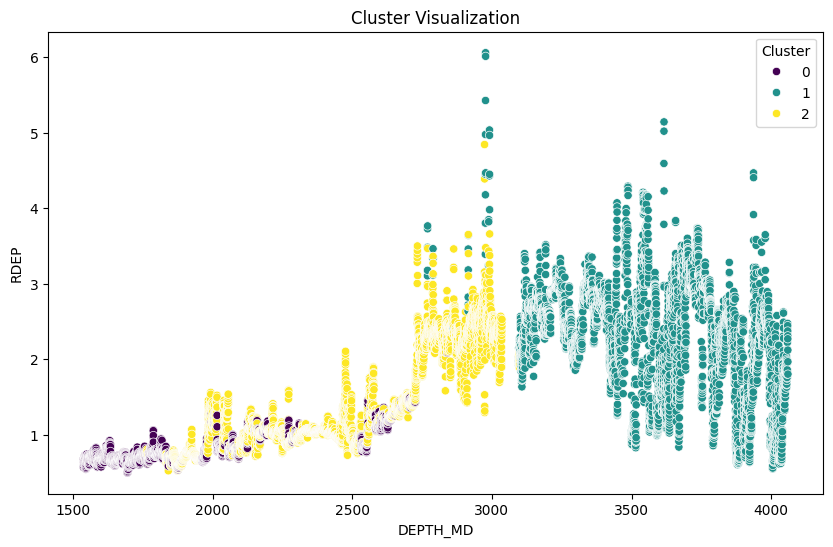

Cluster Centers:
[[-1.19129775  1.16911003 -1.33568764  1.18755303  1.06078298 -0.9915158
  -1.01145127  0.55392408  1.20356938  0.28974362  0.8776574   1.49567098
   0.58660649  0.79131785]
 [ 1.07446743 -1.08500901  1.01487909 -1.07369982 -1.13440504  0.78722473
   0.79835508 -0.57022783 -0.80605196  0.48280162  0.11556381 -0.89903934
  -0.9990965  -1.24952276]
 [-0.44235243  0.46248174 -0.31972592  0.44338514  0.55883603 -0.26877304
  -0.26981537  0.2712584   0.18741541 -0.58331917 -0.51637468  0.13760323
   0.65421922  0.79131785]]


In [ ]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Visualize the clusters (example using two features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['DEPTH_MD'], y=data['RDEP'], hue=data['Cluster'], palette='viridis')
plt.xlabel('DEPTH_MD')
plt.ylabel('RDEP')
plt.title('Cluster Visualization')
plt.show()

# Print the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

In [ ]:
data

DEPTH_MD         X_LOC      Y_LOC        Z_LOC       CALI      RMED  \
0      1537.2784  520157.59375  6753015.0 -1514.570923  16.915091  0.678186   
1      1537.4304  520157.56250  6753015.0 -1514.721436  17.062044  0.668361   
2      1537.5824  520157.56250  6753015.0 -1514.871826  17.215485  0.663086   
3      1537.7344  520157.53125  6753015.0 -1515.022217  17.230671  0.651641   
4      1537.8864  520157.50000  6753015.0 -1515.172607  17.227697  0.628769   
...          ...           ...        ...          ...        ...       ...   
16065  4059.2624  518883.34375  6753493.5 -3593.686279   8.496387  2.222968   
16066  4059.4144  518883.31250  6753493.5 -3593.833496   8.469977  2.179392   
16067  4059.5664  518883.25000  6753493.5 -3593.980713   8.291380  1.999954   
16068  4059.7184  518883.21875  6753493.5 -3594.127686   8.180573  1.883621   
16069  4059.8704  518883.18750  6753493.5 -3594.274902   8.192591  1.706857   

           RDEP        GR      NPHI       PEF      DRHO         DTC  \
0      0.676696  5.049860  0.489855  1.656149  0.034214  136.143692   
1      0.664551  5.071150  0.507444  1.679017  0.027367  138.066788   
2      0.663424  5.048891  0.517302  1.705233  0.023611  139.611694   
3      0.650930  5.037921  0.542876  1.768047  0.022974  142.077103   
4      0.627616  5.045937  0.559193  1.794917  0.015735  144.969299   
...         ...       ...       ...       ...       ...         ...   
16065  2.311417  3.545958  0.120742  1.721023  0.014212   72.625191   
16066  2.272012  3.518351  0.122617  1.717063  0.005598   72.021523   
16067  2.122335  3.550880  0.124884  1.670431 -0.002153   73.153671   
16068  1.968340  3.562583  0.127711  1.641157 -0.006725   73.964172   
16069  1.804869  3.584572  0.133222  1.674300 -0.006173   74.375595   

               SP         BS  Cluster  
0      142.235397  12.250001        0  
1      141.834976  12.250001        0  
2      142.051178  12.250001        0  
3      142.475235  12.250001        0  
4      142.213425  12.250001        0  
...           ...        ...      ...  
16065  163.583664   8.500000        1  
16066  164.434052   8.500000        1  
16067  165.289703   8.500000        1  
16068  164.109253   8.500000        1  
16069  164.015747   8.500000        1  

[16070 rows x 15 columns]

In [ ]:
# Compute evaluation metrics
silhouette_avg = silhouette_score(scaled_features, clusters)
davies_bouldin = davies_bouldin_score(scaled_features, clusters)
calinski_harabasz = calinski_harabasz_score(scaled_features, clusters)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")

Silhouette Score: 0.37
Davies-Bouldin Index: 1.19
Calinski-Harabasz Index: 13012.04


In [ ]:
### The metrics experienced an increase. This means we don't have the optimal cluster yet

#### 2 Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


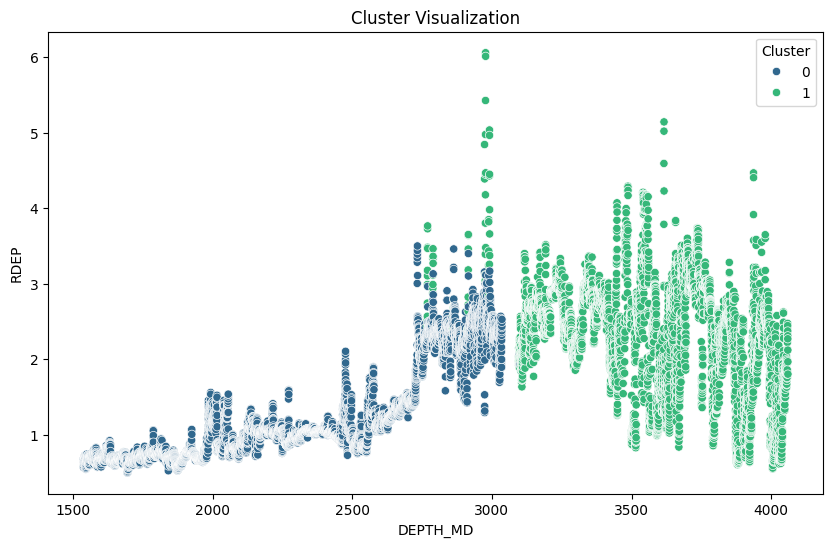

Cluster Centers:
[[-0.68405226  0.69082487 -0.64618417  0.68352078  0.71881101 -0.50517033
  -0.51272448  0.3634683   0.51393863 -0.30891111 -0.06993664  0.57549808
   0.63579494  0.79131785]
 [ 1.06917259 -1.07975817  1.00998483 -1.06834189 -1.12350046  0.78958042
   0.80138755 -0.56810037 -0.80328526  0.48282758  0.10931085 -0.89950258
  -0.99374648 -1.23682854]]


In [10]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Visualize the clusters (example using two features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['DEPTH_MD'], y=data['RDEP'], hue=data['Cluster'], palette='viridis')
plt.xlabel('DEPTH_MD')
plt.ylabel('RDEP')
plt.title('Cluster Visualization')
plt.show()

# Print the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

In [ ]:
# Compute evaluation metrics
silhouette_avg = silhouette_score(scaled_features, clusters)
davies_bouldin = davies_bouldin_score(scaled_features, clusters)
calinski_harabasz = calinski_harabasz_score(scaled_features, clusters)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")

Silhouette Score: 0.48
Davies-Bouldin Index: 0.85
Calinski-Harabasz Index: 17922.11


In [11]:
# Get the cluster centers in the original feature space
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print("Cluster Centers in Original Feature Space:")
print(cluster_centers_df)

Cluster Centers in Original Feature Space:
      DEPTH_MD          X_LOC         Y_LOC        Z_LOC       CALI      RMED  \
0  2282.913345  519811.387991  6.753212e+06 -2127.158514  13.110384  1.206249   
1  3573.848242  519087.592584  6.753430e+06 -3164.528265   8.913978  2.300166   

       RDEP        GR      NPHI       PEF      DRHO         DTC          SP  \
0  1.222716  4.900012  0.359316  1.544877 -0.003445  103.957202  155.884666   
1  2.341613  4.448479  0.233664  1.668444 -0.000217   73.311623  -88.633743   

          BS  
0  12.250001  
1   8.549148  


### Analysis of the above info

**Key Observations**

**Depth:**

Cluster 0 represents shallower depths (around 2282.91 meters).
Cluster 1 represents deeper depths (around 3573.85 meters).

**Caliper (CALI):**

Cluster 0 has a larger average borehole diameter (13.11) compared to Cluster 1 (8.91).

**Resistivity (RMED, RDEP):**

Cluster 1 has higher resistivity values (RMED: 2.30, RDEP: 2.34) compared to Cluster 0 (RMED: 1.21, RDEP: 1.22), indicating different fluid content and lithology.

**Gamma Ray (GR):**

Both clusters have similar gamma ray readings, indicating similar shale content.

**Neutron Porosity (NPHI):**

Cluster 0 has higher porosity (0.36) compared to Cluster 1 (0.23).

**Photoelectric Absorption Factor (PEF):**

Cluster 1 has a slightly higher PEF (1.67) compared to Cluster 0 (1.54), indicating different mineral compositions.
Sonic (DTC):

Cluster 0 has higher compressional slowness (103.96) compared to Cluster 1 (73.31), indicating different rock mechanical properties.

**Spontaneous Potential (SP):**

Cluster 0 has a positive SP value (155.88), while Cluster 1 has a negative SP value (-88.63), indicating different permeability and fluid content.

**Features and Their Relevance**
WELL: Identifier for the well. Not useful for clustering as it doesn't provide geological information.

DEPTH_MD: Measured depth. Important for understanding the vertical profile of the well.

X_LOC, Y_LOC, Z_LOC: Spatial coordinates. Useful for spatial context but not directly related to lithology.

CALI: Caliper. Measures the borehole diameter, which can indicate borehole stability and lithology changes.

RMED, RDEP: Medium and deep resistivity. Important for identifying fluid content and lithology.

GR: Gamma ray. Key feature for identifying shale content.

NPHI: Neutron porosity. Indicates porosity and fluid content.

PEF: Photoelectric absorption factor. Useful for identifying mineral composition.

DRHO: Density correction. Indicates borehole conditions and lithology.

DTC: Sonic (compressional slowness). Related to rock mechanical properties.

SP: Spontaneous potential. Indicates permeability and fluid content.

BS: Bit size. Not directly related to lithology.

**Key Features for Clustering and Predicting Lithologies**

Based on the relevance to geological and lithological characteristics, the following features are considered key:

DEPTH_MD: Provides the vertical context.

CALI: Indicates borehole diameter changes.

RMED, RDEP: Resistivity measurements for fluid content and lithology.

GR: Identifies shale content.

NPHI: Indicates porosity and fluid content.

PEF: Identifies mineral composition.

DRHO: Indicates borehole conditions and lithology.

DTC: Related to rock mechanical properties.

SP: Indicates permeability and fluid content.

Explanation
Key Features: Selected based on their relevance to lithological characteristics.

Scaling: Standardized the key features to ensure they contribute equally to the clustering process.

Clustering: Applied K-Means clustering with the optimal number of clusters (2).

**Cluster Centers**: Transformed back to the original feature space for interpretation.

**Feature Distributions**: Visualized the distribution of key features within each cluster to identify distinct lithological characteristics.

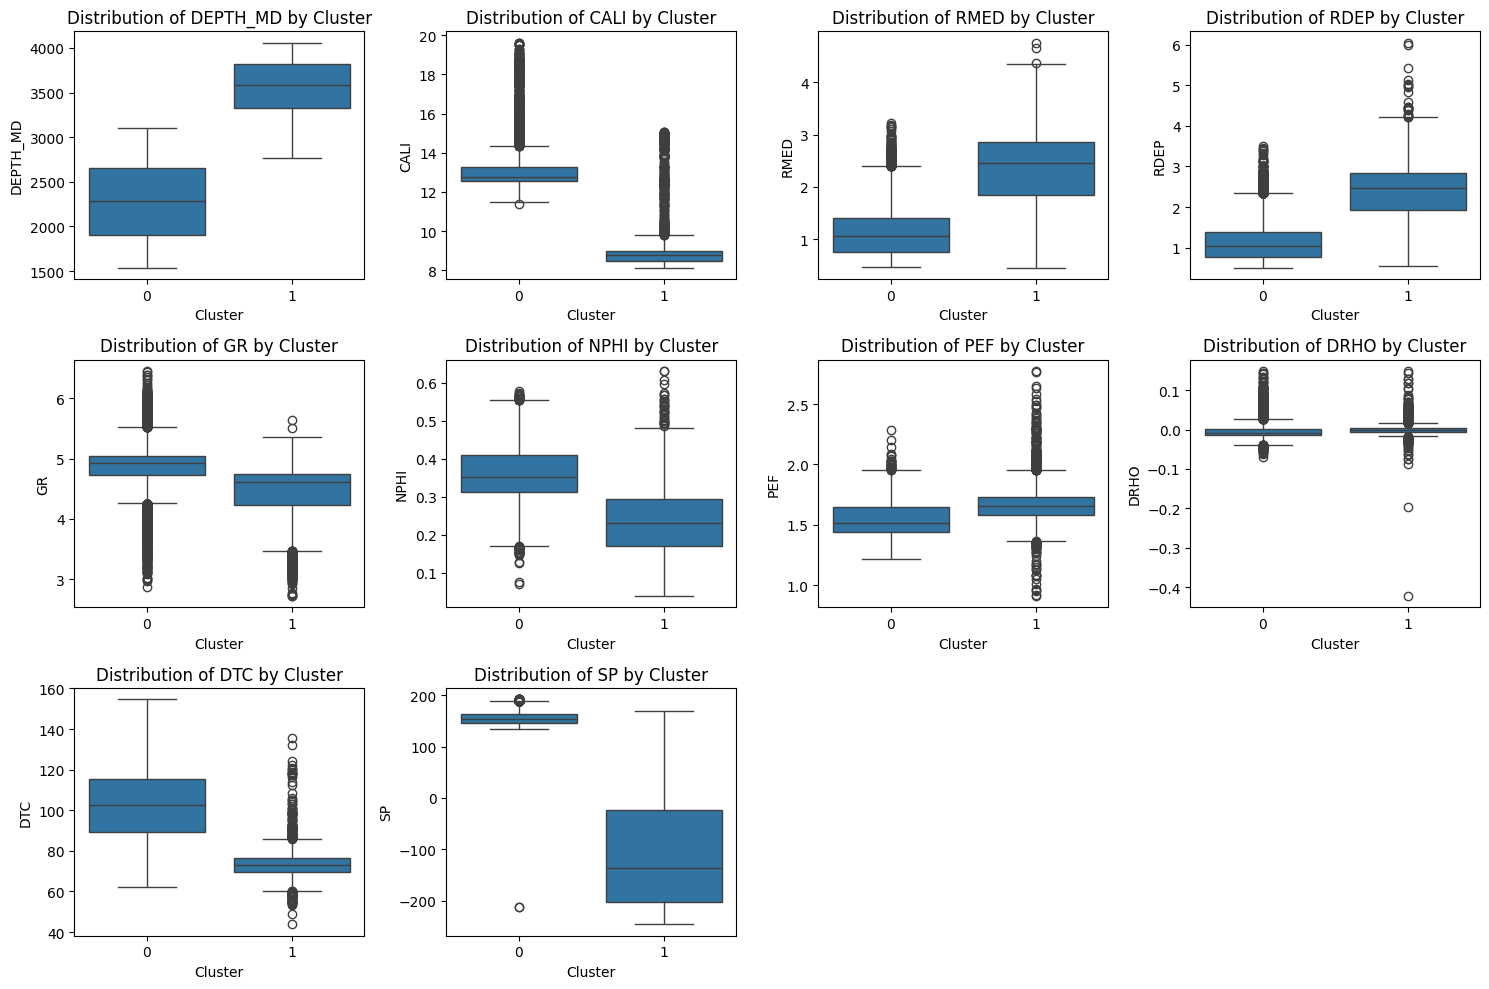

In [14]:
# Visualize the distribution of key features within each cluster
key_features = ['DEPTH_MD', 'CALI', 'RMED', 'RDEP', 'GR', 'NPHI', 'PEF', 'DRHO', 'DTC', 'SP']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.title(f'Distribution of {feature} by Cluster')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

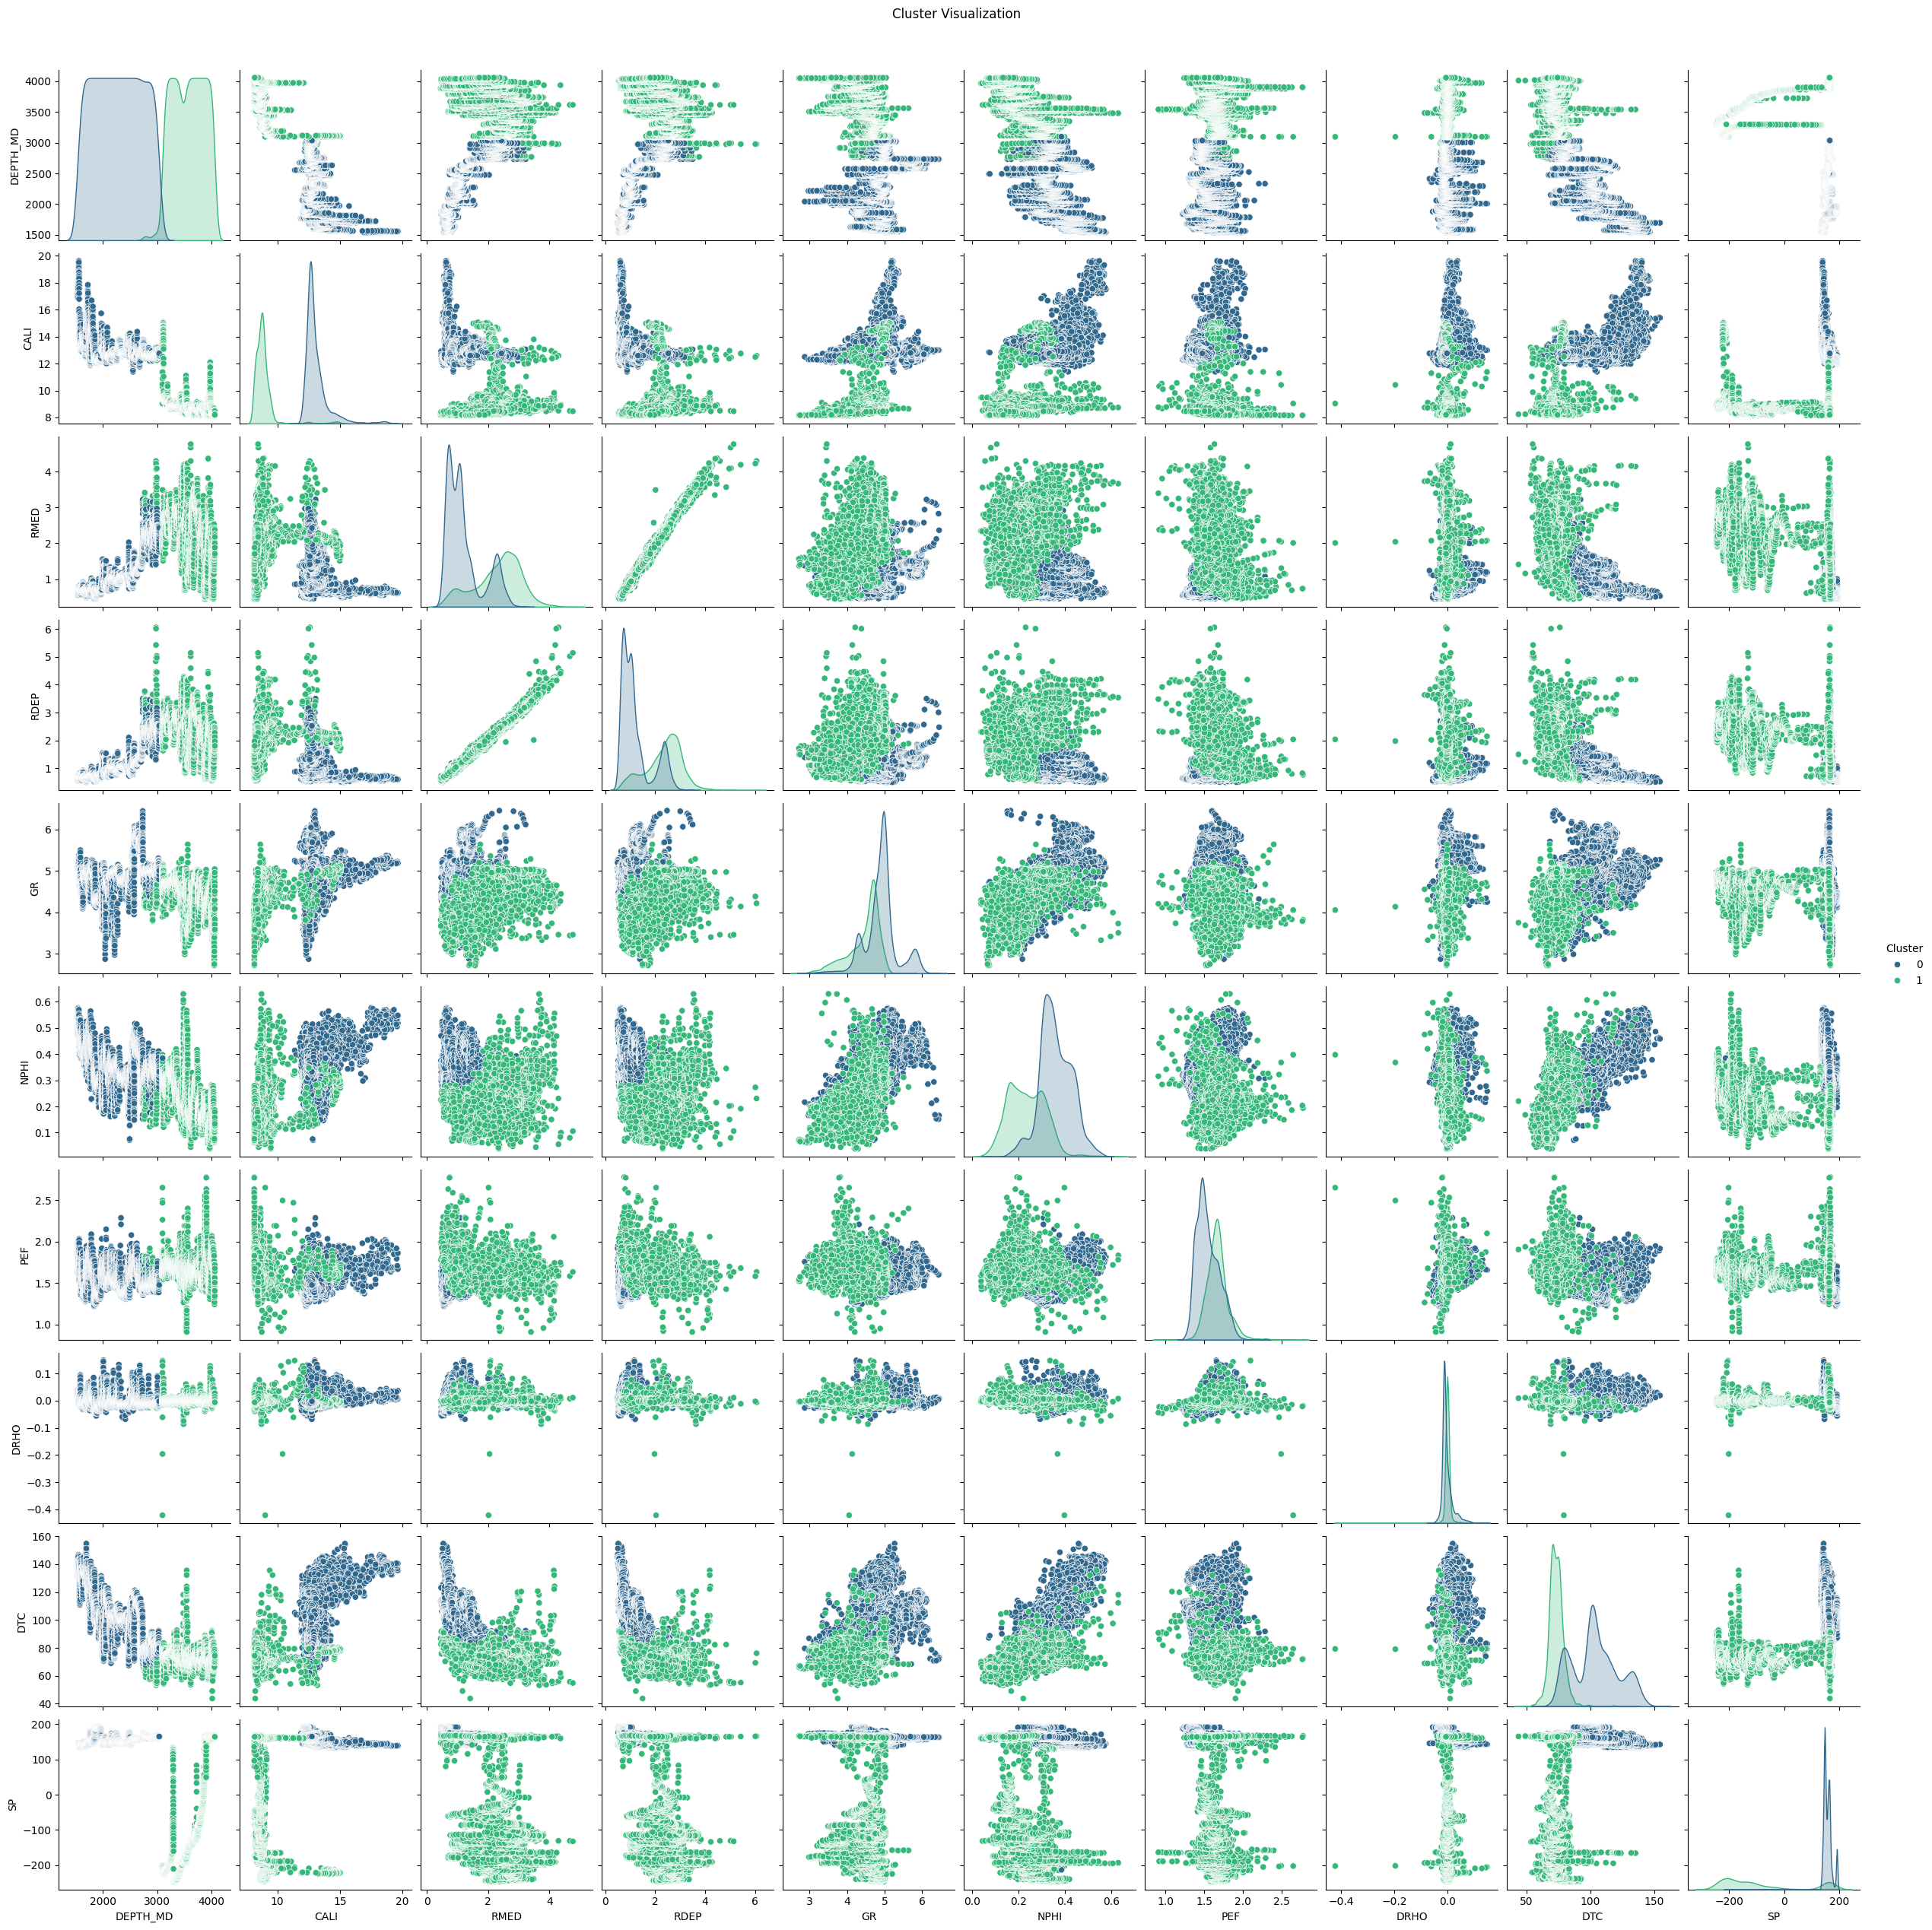

In [15]:
# Visualize the clusters using multiple feature pairs
plt.figure(figsize=(15, 10))
sns.pairplot(data, vars=['DEPTH_MD', 'CALI', 'RMED', 'RDEP', 'GR', 'NPHI', 'PEF', 'DRHO', 'DTC', 'SP'], hue='Cluster', palette='viridis')
plt.suptitle('Cluster Visualization', y=1.02)
plt.show()

In [16]:
data

DEPTH_MD         X_LOC      Y_LOC        Z_LOC       CALI      RMED  \
0      1537.2784  520157.59375  6753015.0 -1514.570923  16.915091  0.678186   
1      1537.4304  520157.56250  6753015.0 -1514.721436  17.062044  0.668361   
2      1537.5824  520157.56250  6753015.0 -1514.871826  17.215485  0.663086   
3      1537.7344  520157.53125  6753015.0 -1515.022217  17.230671  0.651641   
4      1537.8864  520157.50000  6753015.0 -1515.172607  17.227697  0.628769   
...          ...           ...        ...          ...        ...       ...   
16065  4059.2624  518883.34375  6753493.5 -3593.686279   8.496387  2.222968   
16066  4059.4144  518883.31250  6753493.5 -3593.833496   8.469977  2.179392   
16067  4059.5664  518883.25000  6753493.5 -3593.980713   8.291380  1.999954   
16068  4059.7184  518883.21875  6753493.5 -3594.127686   8.180573  1.883621   
16069  4059.8704  518883.18750  6753493.5 -3594.274902   8.192591  1.706857   

           RDEP        GR      NPHI       PEF      DRHO         DTC  \
0      0.676696  5.049860  0.489855  1.656149  0.034214  136.143692   
1      0.664551  5.071150  0.507444  1.679017  0.027367  138.066788   
2      0.663424  5.048891  0.517302  1.705233  0.023611  139.611694   
3      0.650930  5.037921  0.542876  1.768047  0.022974  142.077103   
4      0.627616  5.045937  0.559193  1.794917  0.015735  144.969299   
...         ...       ...       ...       ...       ...         ...   
16065  2.311417  3.545958  0.120742  1.721023  0.014212   72.625191   
16066  2.272012  3.518351  0.122617  1.717063  0.005598   72.021523   
16067  2.122335  3.550880  0.124884  1.670431 -0.002153   73.153671   
16068  1.968340  3.562583  0.127711  1.641157 -0.006725   73.964172   
16069  1.804869  3.584572  0.133222  1.674300 -0.006173   74.375595   

               SP         BS  Cluster  
0      142.235397  12.250001        0  
1      141.834976  12.250001        0  
2      142.051178  12.250001        0  
3      142.475235  12.250001        0  
4      142.213425  12.250001        0  
...           ...        ...      ...  
16065  163.583664   8.500000        1  
16066  164.434052   8.500000        1  
16067  165.289703   8.500000        1  
16068  164.109253   8.500000        1  
16069  164.015747   8.500000        1  

[16070 rows x 15 columns]

### Further Division

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

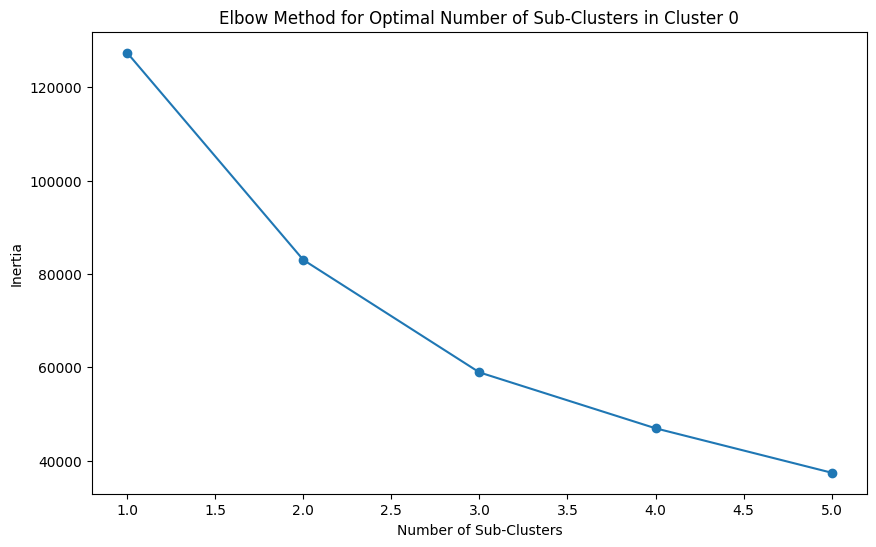

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

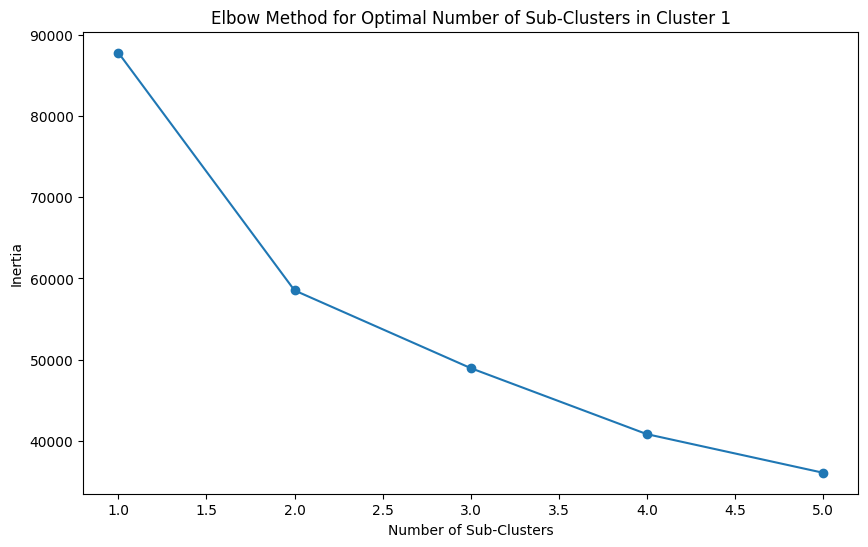

In [ ]:
# Sub-clustering within each identified cluster
for cluster_label in np.unique(clusters):
    cluster_data = data[data['Cluster'] == cluster_label]
    scaled_cluster_data = scaler.fit_transform(cluster_data[features])

    # Determine the optimal number of sub-clusters using the Elbow Method
    inertia = []
    k_range = range(1, 6)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_cluster_data)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow Curve for sub-clustering
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia, marker='o')
    plt.xlabel('Number of Sub-Clusters')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method for Optimal Number of Sub-Clusters in Cluster {cluster_label}')
    plt.show()

In [17]:
# Assign meaningful labels to the clusters
data['Lithology'] = data['Cluster'].map({0: 'Lithology A', 1: 'Lithology B'})

# Display the first few rows of the labeled data
print(data.head())

# Save the labeled data to a new CSV file
data.to_csv('labeled_mystery_well.csv', index=False)

    DEPTH_MD         X_LOC      Y_LOC        Z_LOC       CALI      RMED  \
0  1537.2784  520157.59375  6753015.0 -1514.570923  16.915091  0.678186   
1  1537.4304  520157.56250  6753015.0 -1514.721436  17.062044  0.668361   
2  1537.5824  520157.56250  6753015.0 -1514.871826  17.215485  0.663086   
3  1537.7344  520157.53125  6753015.0 -1515.022217  17.230671  0.651641   
4  1537.8864  520157.50000  6753015.0 -1515.172607  17.227697  0.628769   

       RDEP        GR      NPHI       PEF      DRHO         DTC          SP  \
0  0.676696  5.049860  0.489855  1.656149  0.034214  136.143692  142.235397   
1  0.664551  5.071150  0.507444  1.679017  0.027367  138.066788  141.834976   
2  0.663424  5.048891  0.517302  1.705233  0.023611  139.611694  142.051178   
3  0.650930  5.037921  0.542876  1.768047  0.022974  142.077103  142.475235   
4  0.627616  5.045937  0.559193  1.794917  0.015735  144.969299  142.213425   

          BS  Cluster    Lithology  
0  12.250001        0  Lithology A  


###### **Defend the Choice of Data and Hyperparameters:**

**Data**: We used all available well log curves and spatial coordinates (excluding WELL).
**bold text**
**Scaling**: Standardized the features to ensure they contribute equally to the clustering process.
Number of Clusters: Determined using the Elbow Method and validated with clustering metrics.
Describe the Predicted Clusters:

###### **Analyze the characteristics of each cluster to understand the potential lithologies they represent.**
- Visualize the clusters using multiple feature pairs to gain insights into their separation.

##### **Further Division of Clusters:**
Evaluate if sub-clustering within the identified clusters can reveal more granular lithologies.

#### Conclusion

> *Based on the clustering analysis and the interpretation of the cluster centers, we have identified two distinct clusters in the borehole data. Each cluster represents a group of data points with similar geological and lithological characteristics.*



**Summary of Findings**

**Cluster 0:**

Represents shallower depths (around 2282.91 meters).

Larger borehole diameter (CALI: 13.11).

Lower resistivity values (RMED: 1.21, RDEP: 1.22).

Higher porosity (NPHI: 0.36).

Higher compressional slowness (DTC: 103.96).

Positive spontaneous potential (SP: 155.88).


**Cluster 1:**

Represents deeper depths (around 3573.85 meters).

Smaller borehole diameter (CALI: 8.91).

Higher resistivity values (RMED: 2.30, RDEP: 2.34).

Lower porosity (NPHI: 0.23).

Lower compressional slowness (DTC: 73.31).

Negative spontaneous potential (SP: -88.63).

**Conclusion**

Based on the clustering analysis, we can conclude that there are two distinct lithologies present in the borehole. Each lithology is characterized by different geological and petrophysical properties as identified by the clustering model.


